In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # For creating plots
from datetime import date

# Brazilian Ecommerce | Purchase Trend
### Exploring the database made public by Olist, the largest department store in Brazil. The datasets consist of customer transaction details. The project gives us the opportunity to learn how to merge tables, clean data and use other tools for vivisualization.

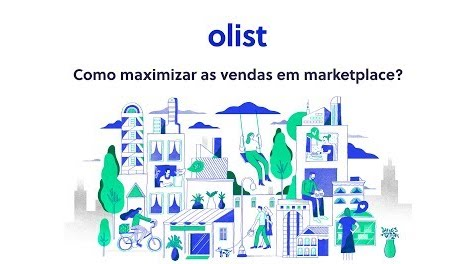

In [2]:
from IPython.display import Image
Image(filename='img/olist_cover.jpg', width=650, height=650)

##### Source: Kaggle

# CSV

In [3]:
customers = pd.read_csv('olist_customers_dataset.csv', sep=',')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


## Number of Unique customers

In [5]:
customers = customers["customer_unique_id"].nunique()
print("Number of unique customers:",customers)

Number of unique customers: 96096


In [6]:
orders = pd.read_csv('olist_orders_dataset.csv', sep=',')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
orders['order_purchase_timestamp'].describe()

count                   99441
unique                  98875
top       2018-03-31 15:08:21
freq                        3
Name: order_purchase_timestamp, dtype: object

In [9]:
order_payments = pd.read_csv('olist_order_payments_dataset.csv', sep=',')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [11]:
order_payments['payment_value'].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

# Unique, First order, 6 months

In [12]:
customers = pd.read_csv('customer_purchase_trend.csv', sep=',')
customers.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018,5,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018,5,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017,3,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017,10,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017,11,1,196.89


In [13]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96095 entries, 0 to 96094
Data columns (total 6 columns):
customer_unique_id             96095 non-null object
date_first_order               96095 non-null object
year_first_order               96095 non-null int64
month_first_order              96095 non-null int64
total_orders_first_6_months    96095 non-null int64
total_paid_first_6_months      96095 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.4+ MB


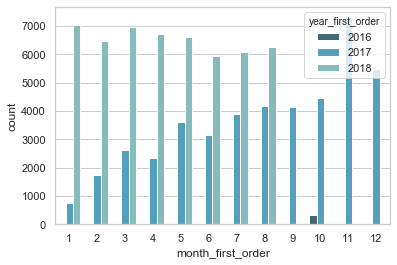

In [14]:
sns.set(style="whitegrid")

ax = sns.countplot(x="month_first_order", hue = "year_first_order", data=customers, palette = "GnBu_d")



fig = plt.figure(figsize=(5,5))
ax = fig.gca()   
new_customers_by_month.plot(kind = 'bar', ax = ax)
ax.set_title('New Customers By Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of New Users')





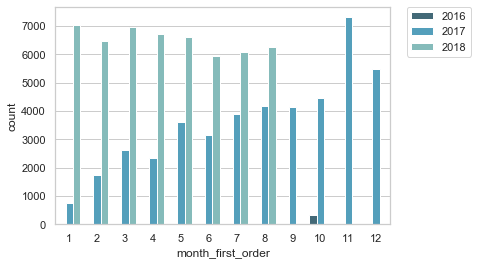

In [23]:
sns.set(style="whitegrid")
ax = sns.countplot(x="month_first_order", hue = "year_first_order", data=customers, palette = "GnBu_d")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


# Customer Purchase Trend | Regression models

In [17]:
linear_model = smf.ols(formula='total_paid_first_6_months ~ month_first_order + total_orders_first_6_months', data=customers)
fitted_model = linear_model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     total_paid_first_6_months   R-squared:                       0.013
Model:                                   OLS   Adj. R-squared:                  0.013
Method:                        Least Squares   F-statistic:                     633.1
Date:                       Tue, 10 Dec 2019   Prob (F-statistic):          6.81e-274
Time:                               03:14:27   Log-Likelihood:            -6.5859e+05
No. Observations:                      96095   AIC:                         1.317e+06
Df Residuals:                          96092   BIC:                         1.317e+06
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      19.3987      4.377      4.432      0.000      10.821      27.977
month_first_order               0.1792      0.229      0.784      0.433      -0.269       0.627
total_orders_first_6_months   141.1832      3.968     35.579      0.000     133.406     148.961
==============================================================================
Omnibus:                   150147.797   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        248183000.107
Skew:                           9.582   Prob(JB):                         0.00
Kurtosis:                     251.228   Cond. No.                         54.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""